# 1. 数据的清洗处理 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_json('github2.jl', lines=True)
df.head(3)

,user,proj,star,proj_page_link,about,Readme,fork,Releases,branches,Contributors,toptags,Languages,issues_open_num,issues_closed_num,pulls_open_num,pulls_closed_num,dependency
0,tensorflow,tensorflow,160000,http://github.com/tensorflow/tensorflow,None,http://github.com/tensorflow/tensorflow/blob/m...,85600,146,44,"3,003","[python, machine-learning, deep-neural-network...","[[C++, 62.1%], [Python, 24.9%], [MLIR, 3.7%], ...","2,903","30,171",183,"18,737","[keras-applications, keras-preprocessing, abse..."
1,mkdocs,mkdocs,13000,http://github.com/mkdocs/mkdocs,Project documentation with Markdown.,http://github.com/mkdocs/mkdocs/blob/master/RE...,1800,2,6,187,"[python, markdown, static-site-generator, docu...","[[Python, 74.6%], [JavaScript, 18.7%], [HTML, ...",99,"1,478",15,941,"[click, ghp-import, importlib_metadata, jinja,..."
2,leon-ai,leon,7900,http://github.com/leon-ai/leon,None,http://github.com/leon-ai/leon/blob/develop/RE...,686,0,7,15,"[nodejs, python, bot, text-to-speech, automati...","[[JavaScript, 60.0%], [Python, 37.5%], [CSS, 1...",38,150,17,109,"[acorn, axios, bl, dot-prop, elliptic, eslint-..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user               990 non-null    object
 1   proj               990 non-null    object
 2   star               990 non-null    int64 
 3   proj_page_link     990 non-null    object
 4   about              765 non-null    object
 5   Readme             990 non-null    object
 6   fork               990 non-null    int64 
 7   Releases           990 non-null    int64 
 8   branches           990 non-null    object
 9   Contributors       990 non-null    object
 10  toptags            990 non-null    object
 11  Languages          990 non-null    object
 12  issues_open_num    990 non-null    object
 13  issues_closed_num  990 non-null    object
 14  pulls_open_num     990 non-null    object
 15  pulls_closed_num   990 non-null    object
 16  dependency         990 non-null    object
dt

In [4]:
df.isnull().sum()

user                   0
proj                   0
star                   0
proj_page_link         0
about                225
Readme                 0
fork                   0
Releases               0
branches               0
Contributors           0
toptags                0
Languages              0
issues_open_num        0
issues_closed_num      0
pulls_open_num         0
pulls_closed_num       0
dependency             0
dtype: int64

In [5]:
df["pulls_closed_num"] = df["pulls_closed_num"].map(lambda x: int(x.replace(",", "")))
df["pulls_open_num"] = df["pulls_open_num"].map(lambda x: int(x.replace(",", "")))
df["issues_closed_num"] = df["issues_closed_num"].map(lambda x: int(x.replace(",", "")))
df["issues_open_num"] = df["issues_open_num"].map(lambda x: int(x.replace(",", "")))
df["branches"] = df["branches"].map(lambda x: int(x.replace(",", "")))

In [6]:
def str_to_num(str):  #去掉逗号和加号
    if str:
        str = str.strip()
        return int(str.replace(",", "").replace("+", "")) 
    else:
        return 0

df["Contributors"] = df["Contributors"].map(lambda x:str_to_num(x))

In [7]:
df["toptags"] = df["toptags"].map(lambda x: " ".join(x))
df["dependency"] = df["dependency"].map(lambda x: " ".join(x))

In [8]:
def transform(str):   #去掉标点符号
    if not str:
        return " "
    lst = list(str)
    for i in range(len(lst)):
        if not lst[i].isalpha() and not lst[i].isdigit():
            lst[i] = " "
    res = "".join(lst)
    return res

In [9]:
df["about"] = df["about"].map(lambda x: transform(x))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user               990 non-null    object
 1   proj               990 non-null    object
 2   star               990 non-null    int64 
 3   proj_page_link     990 non-null    object
 4   about              990 non-null    object
 5   Readme             990 non-null    object
 6   fork               990 non-null    int64 
 7   Releases           990 non-null    int64 
 8   branches           990 non-null    int64 
 9   Contributors       990 non-null    int64 
 10  toptags            990 non-null    object
 11  Languages          990 non-null    object
 12  issues_open_num    990 non-null    int64 
 13  issues_closed_num  990 non-null    int64 
 14  pulls_open_num     990 non-null    int64 
 15  pulls_closed_num   990 non-null    int64 
 16  dependency         990 non-null    object
dt

# 2. 数据的统计分析

In [11]:
df.drop(columns=["proj_page_link","user","Readme","Languages"], inplace=True)   #去掉几个不太好分析的列
df.head(3)

,proj,star,about,fork,Releases,branches,Contributors,toptags,issues_open_num,issues_closed_num,pulls_open_num,pulls_closed_num,dependency
0,tensorflow,160000,,85600,146,44,3003,python machine-learning deep-neural-networks d...,2903,30171,183,18737,keras-applications keras-preprocessing abseil-...
1,mkdocs,13000,Project documentation with Markdown,1800,2,6,187,python markdown static-site-generator document...,99,1478,15,941,click ghp-import importlib_metadata jinja mark...
2,leon,7900,,686,0,7,15,nodejs python bot text-to-speech automation pr...,38,150,17,109,acorn axios bl dot-prop elliptic eslint-utils ...


In [12]:
df.select_dtypes(include=["object"])  #所有字符列

,proj,about,toptags,dependency
0,tensorflow,,python machine-learning deep-neural-networks d...,keras-applications keras-preprocessing abseil-...
1,mkdocs,Project documentation with Markdown,python markdown static-site-generator document...,click ghp-import importlib_metadata jinja mark...
2,leon,,nodejs python bot text-to-speech automation pr...,acorn axios bl dot-prop elliptic eslint-utils ...
3,visidata,A terminal spreadsheet multitool for discoveri...,python cli tsv json csv reconciliation sqlite ...,datapackage dnslib dpkt h5py mapbox-vector-til...
4,elasticsearch-dsl-py,,python search elasticsearch,elasticsearch-py ipaddress dateutil six
...,...,...,...,...
985,thefuck,Magnificent app which corrects your previous c...,python shell,flake8 python-mock pexpect pypandoc pytest pyt...
986,awesome-python,A curated list of awesome Python frameworks l...,python awesome python-library collections pyth...,mkdocs mkdocs-material
987,Python,,python education algorithm practice interview ...,beautifulsoup fake-useragent keras lxml matplo...
988,CS-Notes,,python java computer-science algorithm leetcod...,chai gulp gulp-concat gulp-header gulp-rename ...


In [13]:
df.select_dtypes(include=["int"])   #所有数值列

,star,fork,Releases,branches,Contributors,issues_open_num,issues_closed_num,pulls_open_num,pulls_closed_num
0,160000,85600,146,44,3003,2903,30171,183,18737
1,13000,1800,2,6,187,99,1478,15,941
2,7900,686,0,7,15,38,150,17,109
3,4400,173,31,15,46,27,756,4,289
4,3300,707,2,16,117,81,1110,11,325
...,...,...,...,...,...,...,...,...,...
985,64200,3000,16,2,172,180,429,42,558
986,104000,20000,0,2,392,11,191,185,1393
987,120000,32299,0,15,727,26,778,162,4226
988,140000,44800,0,1,231,78,431,37,526


## 进行数值类型的数据统计

In [14]:
df.select_dtypes(include=["int"]).describe() 

,star,fork,Releases,branches,Contributors,issues_open_num,issues_closed_num,pulls_open_num,pulls_closed_num
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,7247.676768,1583.515152,23.659596,25.691919,125.983838,165.524242,883.437374,29.514141,1112.034343
std,12057.422002,3972.486056,65.532279,228.977370,294.321505,401.457780,2233.700028,145.633310,3832.401825
min,1800.000000,36.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.000000,357.000000,0.000000,2.000000,15.000000,14.000000,60.000000,2.000000,41.000000
50%,3800.000000,668.000000,6.000000,5.000000,46.000000,51.500000,259.000000,7.000000,200.000000
75%,7500.000000,1500.000000,25.000000,14.000000,119.000000,148.000000,807.250000,20.000000,704.500000
max,160000.000000,85600.000000,924.000000,6948.000000,5000.000000,6935.000000,30171.000000,3138.000000,59579.000000


## 查看数值类型数据的相关性矩阵

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

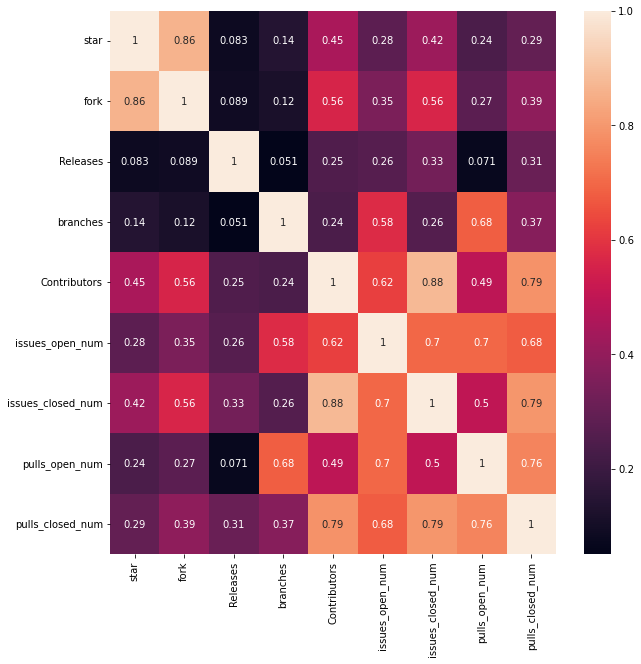

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

# 3. 特征矩阵和预估向量的创建

## (1) 字符字段转换成特征向量

#### 提取toptags列的词频向量

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
cv_toptags = CountVectorizer(max_features=100)    #提取词频前100的文本特征

In [19]:
toptags_feature = cv_toptags.fit_transform(df["toptags"]).toarray()

In [20]:
toptags_feature.shape

(990, 100)

#### 提取about列的词频向量

In [21]:
cv_about = CountVectorizer(max_features=100)
about_feature = cv_about.fit_transform(df["about"]).toarray()
about_feature.shape

(990, 100)

### 根据所有项目的项目名和依赖项构造每个项目的被依赖次数列

In [22]:
cv_dep = CountVectorizer()

In [23]:
cv_dep.fit_transform(df["dependency"])

<990x3815 sparse matrix of type '<class 'numpy.int64'>'
	with 19058 stored elements in Compressed Sparse Row format>

In [24]:
dic_dep = cv_dep.vocabulary_     #词频索引字典

In [25]:
df["cv_depeds"] = 0   #初始化

In [26]:
for i in range(len(df["cv_depeds"])):  #统计每个项目的被依赖次数
    if df["proj"][i] in dic_dep:
        df["cv_depeds"][i] = dic_dep[df["proj"][i]]
        
df["cv_depeds"]

C:\Users\Sion\AppData\Local\Temp/ipykernel_6524/1324575717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cv_depeds"][i] = dic_dep[df["proj"][i]]


0      3384
1      2091
2         0
3         0
4         0
       ... 
985       0
986       0
987       0
988       0
989       0
Name: cv_depeds, Length: 990, dtype: int64

In [27]:
mean_depeds = df["cv_depeds"].mean()  #均值
mean_depeds 

442.8424242424242

In [28]:
def fill(x, a):
    if x == 0:
        x = a
    return x

df["cv_depeds"] = df["cv_depeds"].map(lambda x:fill(x, mean_depeds))  #用均值填充空项
df["cv_depeds"]

0      3384.000000
1      2091.000000
2       442.842424
3       442.842424
4       442.842424
          ...     
985     442.842424
986     442.842424
987     442.842424
988     442.842424
989     442.842424
Name: cv_depeds, Length: 990, dtype: float64

## (2) 数值字段转换成特征向量

In [29]:
num_columns = ["fork","Releases","branches","Contributors","issues_open_num",
               "issues_closed_num","pulls_open_num","pulls_closed_num","cv_depeds"] #数值列(加了被依赖次数列）

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
standardScaler = StandardScaler()

In [32]:
num_features = standardScaler.fit_transform(df[num_columns])
num_features

array([[21.16028814,  1.867816  ,  0.07999626, ...,  1.05445269,
         4.60125913,  3.12219576],
       [ 0.05452361, -0.33068503, -0.08604288, ..., -0.09971261,
        -0.04465106,  1.56566837],
       [-0.22604706, -0.36121976, -0.08167343, ..., -0.08597255,
        -0.26185702, -0.41840155],
       ...,
       [ 7.73596409, -0.36121976, -0.04671782, ...,  0.91018203,
         0.812947  , -0.41840155],
       [10.88445052, -0.36121976, -0.10789013, ...,  0.05142808,
        -0.15299297, -0.41840155],
       [ 6.42655037, -0.36121976, -0.10352068, ...,  0.63538077,
        -0.22374155, -0.41840155]])

In [33]:
num_features.shape

(990, 9)

In [34]:
standardScaler = StandardScaler()

In [35]:
toptags_feature = standardScaler.fit_transform(toptags_feature)
about_feature = standardScaler.fit_transform(toptags_feature)

In [36]:
toptags_feature.shape

(990, 100)

In [37]:
about_feature.shape

(990, 100)

## 构建 X 和 Y

In [38]:
X = np.hstack([num_features,toptags_feature,about_feature])
y = np.array(df["star"])

# 4. 模型训练

## 数据集划分

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 20%作为测试集，80%作为训练集

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((792, 209), (198, 209), (792,), (198,))

### 随机森林模型

In [42]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import accuracy_score

In [43]:
random_model = RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1)

In [44]:
random_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=42)

In [45]:
random_model.score(X_train, y_train)

0.9583353342803427

In [46]:
random_model.score(X_test, y_test)

0.7462140254971743

In [47]:
random_model.predict(X_test)

array([ 24006.        ,   2333.66666667,   6455.66666667,   2261.        ,
         6415.66666667,   3591.        ,  11126.33333333,   9402.33333333,
         2715.33333333,   4106.33333333,   3137.33333333,  14807.66666667,
         4095.66666667,   4188.        ,   3061.33333333,   3273.        ,
         8333.        ,   3075.        ,   4974.        ,   2728.66666667,
         2332.33333333,   6678.66666667,   3381.66666667,  13253.33333333,
         4781.33333333,   3080.33333333,   3028.33333333,  13763.        ,
         7269.        ,   8046.33333333,   2408.33333333,   4264.        ,
         3310.66666667,   9596.33333333,   3820.        ,   2528.        ,
         7450.        ,   4489.        ,   5153.66666667,   3023.66666667,
         6135.        ,   2483.66666667,   3707.33333333,   8298.        ,
         4782.        ,   2464.33333333,  14506.33333333,   4627.33333333,
         2586.33333333,   4382.        ,   9422.33333333,   4114.        ,
         2660.66666667,  

### 线性回归模型

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lr_model = LinearRegression()

In [50]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [51]:
lr_model.score(X_train, y_train)

0.8413163331359812

In [52]:
lr_model.score(X_test, y_test)

0.6348104882774324

In [53]:
lr_model.predict(X_test)

array([18756.15613539,  2939.26551039,  5513.45301039,  3499.32801039,
        5575.71863539,  -101.87120836,  8849.31238539,  6862.70301039,
        6015.64051039,  3395.89051039,  4464.92176039,  9499.20301039,
        3304.17957289,  7039.61198475,  3056.14051039,  3911.57801039,
       12717.60144789,  3256.42176039,  6121.79676039,  3024.82801039,
        3586.01551039,  9118.39051039,  4904.32801039, 13562.76551039,
        4163.51551039, 13267.20301039,  4628.14051039, 18796.85535414,
       13894.76551039,  5986.82801039,  3023.26551039,  2070.78113539,
        4660.67176039, 10825.90613539,  4461.34363539,  7117.89051039,
        1099.56238539,  7185.31238539,  4941.64832289,  3017.82801039,
        1570.51551039,  4426.68738539,  4744.14051039,  5707.25769789,
        7946.39051039,  2789.57801039, 12864.51551039,  5709.95301039,
        3970.45301039,  3018.19519789,  7840.57801039,  2726.20301039,
        3118.82801039, 10841.67957289,  1998.30457289,  3963.07801039,
      

In [54]:
lr_model.coef_  # w 值

array([ 1.03572422e+04,  5.19439483e+02,  1.13101064e+03,  6.58950168e+02,
       -2.14167423e+02, -1.77308920e+03, -3.56047401e+02,  2.71262547e+02,
        4.41689006e+02, -3.14864124e+15, -9.65945386e+14,  2.29690065e+14,
        1.92602612e+14,  2.24119835e+14, -1.49843906e+14,  3.56421108e+14,
        2.23420049e+14, -9.64973474e+14, -1.86392650e+14, -4.02574016e+14,
       -7.85084613e+14,  2.95667876e+14,  2.27899991e+14, -2.24116321e+15,
       -6.59441135e+14,  8.65310422e+14, -4.00962874e+14,  4.47937299e+14,
        4.87528286e+14, -1.70036241e+14,  9.90487871e+14,  1.24921764e+15,
       -9.52287396e+14, -3.76032254e+14,  1.30210855e+15, -7.62429567e+14,
       -1.97436439e+14,  5.50418795e+14,  4.65951052e+14, -3.53906562e+14,
        1.06514335e+15, -6.05734709e+13,  1.02279131e+15,  3.79779220e+14,
        3.08728924e+14,  1.22881183e+15, -6.08633986e+13, -1.14491172e+15,
       -2.79304793e+14, -1.04525761e+14, -9.51744729e+14, -7.81579907e+14,
       -2.81061605e+14, -

In [55]:
lr_model.intercept_  # 截距 b

7181.445549242424

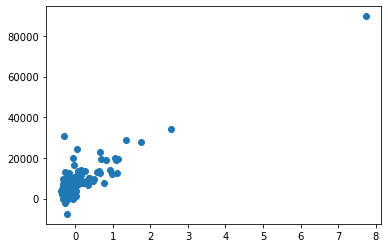

In [56]:
plt.scatter(X_test[:,0], lr_model.predict(X_test))   #复刻数与收藏数的线性关系
plt.show()